<h3 style = 'color: #eb9d50;' >Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h3 style = 'color: #eb9d50;' > Function

In [2]:
# alpha = learning rate
# X = n dimensional vector
# f = loss funtion
# niter = number of iteration
# we need to calculate norm of the data vector each iteration and then plot the distribution of it
# n = 10
# niter = 10000
# x_old = np.random.randint(1,100,size = n)
# alpha = 1e-3
# norm_value = np.empty(niter)
# for i in range(niter):
#     x_new = x_old - alpha*func(x_old)
#     norm_value[i] = np.linalg.norm(x_new)
#     x_old = x_new

In [3]:
def func(x):
    return np.array(2*x)

In [4]:
def cal_norm(n, niter, alpha, fun_grad = func):
    x_old = np.random.randint(1,100,size = n)
    norm_value = np.empty(niter)
    for i in range(niter):
        x_new = x_old - (alpha*fun_grad(x_old))
        norm_value[i] = np.linalg.norm(x_new)
        x_old = x_new
    return list(norm_value)

<h4 style = 'color: #e856f5;' > Only change in number of iteration $(T)$

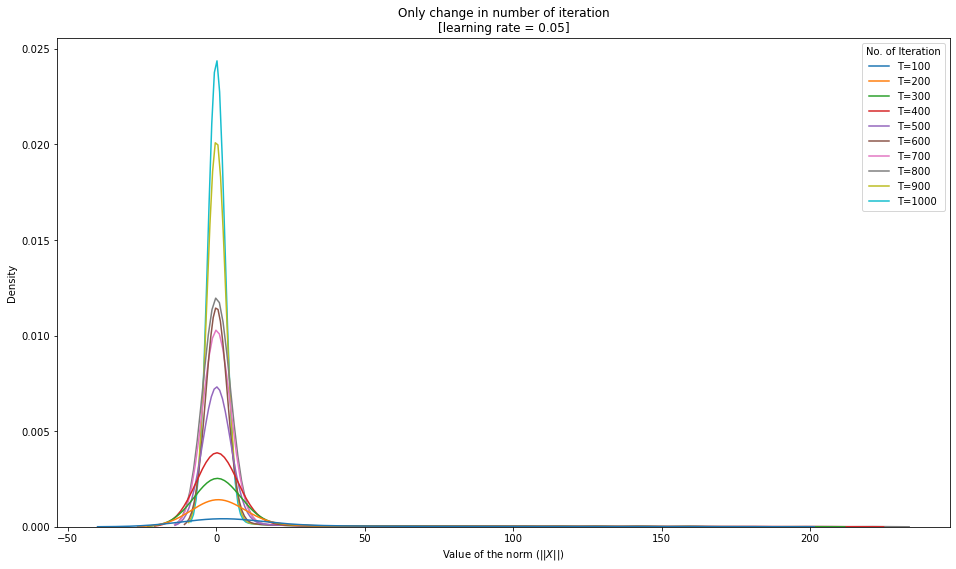

In [5]:
# Making dataframe ----------------------------
lr = 0.05
niters = np.arange(100,1100,100)
norm_value = []
for i in range(10):
    norm_value += cal_norm(10,niters[i],lr)
df1 = pd.DataFrame({'No. of Iteration' : np.repeat(tuple([f'T={i}' for i in niters]),tuple(niters)),'value' : norm_value})
# Plotting part ----------------------------
plt.figure(figsize = (16,9))
sns.kdeplot(data = df1, x = 'value', hue = 'No. of Iteration')
plt.xlabel('Value of the norm ($||X||$)')
plt.title('Only change in number of iteration\n'+f'[learning rate = {lr}]');

For increase the number of iterations, distribution is getting messokurtic to leptokurtic.

<h4 style = 'color: #e856f5;' > Only change in learning rate $(\alpha)$

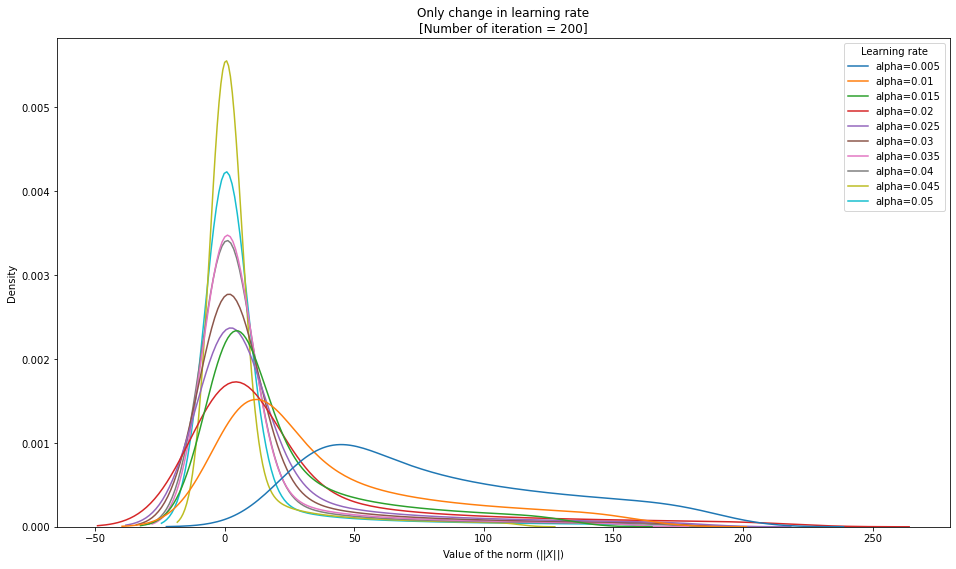

In [6]:
# Making dataframe ----------------------------
niter = 200
lr = np.round(np.arange(0.005,0.051,0.005), 3)
norm_value = []
for i in range(10):
    norm_value += cal_norm(10,niter,lr[i])
df = pd.DataFrame({'Learning rate' : np.repeat(tuple([f'alpha={i}' for i in lr]),200),'value' : norm_value})
df
# Plotting part ----------------------------
plt.figure(figsize = (16,9))
sns.kdeplot(data = df, x = 'value', hue = 'Learning rate')
plt.xlabel('Value of the norm ($||X||$)')
plt.title('Only change in learning rate\n'+f'[Number of iteration = {niter}]');

For increase the value of learning rate, distribution is getting messokurtic to leptokurtic. Also for high value of learning rate distribution of norm is getting skewed to bimodal.

<h4 style = 'color: #e856f5;' > Number of iteration $(T)$ and Learning rate $(\alpha)$ is changed

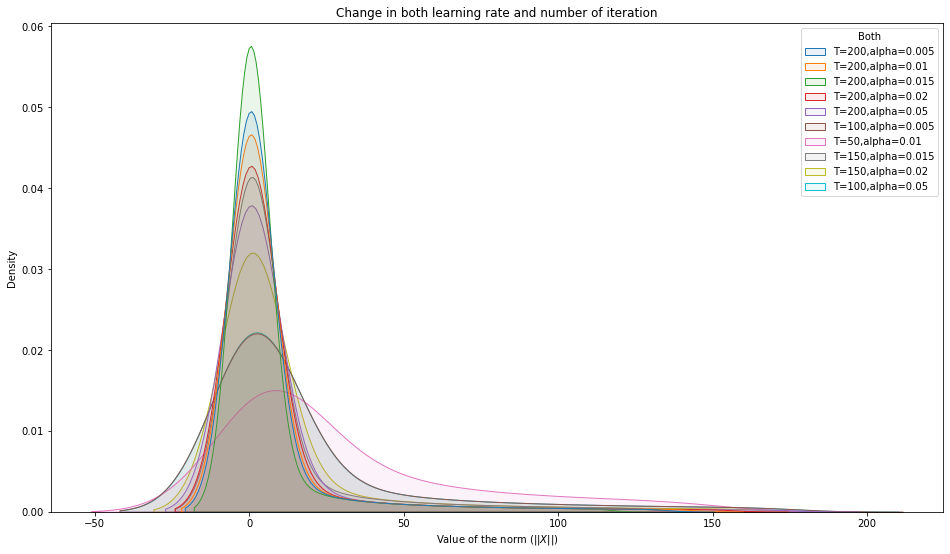

In [7]:
# Making dataframe ----------------------------
niters = [200,200,200,200,200,100,50,150,150,100]
lr = [0.005,0.01,0.015,0.02,0.05,0.005,0.01,0.015,0.02,0.05]
norm_value = []
for i in range(10):
    norm_value += cal_norm(10,niters[i],0.05)
df1 = pd.DataFrame({'Both' : np.repeat(tuple([f'T={i[0]},alpha={i[1]}' for i in zip(niters,lr)]),tuple(niters)),'value' : norm_value})
# Plotting part ----------------------------
plt.figure(figsize = (16,9))
sns.kdeplot(data = df1, x = 'value', hue = 'Both', fill = True, alpha = 0.09, common_norm = False)
plt.xlabel('Value of the norm ($||X||$)')
plt.title('Change in both learning rate and number of iteration');